# Trabalho Prático 1
## Grupo:
* Gabriel Alves Reis, 
* Gabriel Castelo Branco Rocha Alencar Pinto, 2020006523
* Samuel Brísio, 


In [27]:
%pip3 install pandas

UsageError: Line magic function `%pip3` not found.


1- Envoltória Convexa (Gift Wrapping ??)
- Implementar primitiva de posição relativa de semiretas
- Sorted (default do python) com nossa primitiva
- Algoritmo da Envoltória (Gift Wrapping)
    - (conj. de pontos) -> (conj. de pontos)
- função para visualizar a envoltória

In [ ]:
# imports

In [37]:
class Dot:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def orientacaoRelativa(self, dot1, dot2):
        '''Define se: P0P1 está dir/esq de P0P2
            -1 esquerda (P1 anti-horáio a P2 )
            0 colinear
            1 direita (P1 horário a P2)
        '''
        a = (dot1.x - self.x)*(dot2.y - self.y)
        b = (dot2.x - self.x)*(dot1.y - self.y)

        return (a - b)/abs(a-b)

In [40]:
from random import randint

dot_list = []
for i in range(15):
    x = randint(0,100)
    y = randint(0,100)
    a = Dot(x, y)
    dot_list.append(a)


def sortDotsByPolarAngle(dots):

    anchor = dots[0]
    # find anchor
    for p in dots:
        if p.y < anchor.y :
            anchor = p
        elif (p.y == anchor.y and p.x < anchor.x) :
            anchor = p  

    return sorted(dots, cmp= anchor.orientacaoRelativa)

sortDotsByPolarAngle(dot_list)
        

TypeError: 'cmp' is an invalid keyword argument for sort()

In [30]:
# import pygame

# SCREEN = WIDTH, HEIGHT = 300, 300
# CELLSIZE = 20
# PADDING = 20
# ROWS = COLS = (WIDTH - 4*PADDING) # CELLSIZE

# pygame.init()
# win = pygame.display.set_mode(SCREEN)

# # Colors
# WHITE = (255, 255, 255)
# RED = (255, 0, 0)
# YELLOW = (255, 255, 0)
# BLACK = (12, 12, 12)

# running = True
# while running:
#     win.fill(BLACK)
#     for event in pygame.event.get():
#         if event.type == pygame.QUIT:
#             running = False
        
#     for dot in lista:
#         pygame.draw.circle(win, RED, (dot.x, dot.y), 2)
#         pygame.time.delay(500)
#     pygame.display.update()

# pygame.quit()

KeyboardInterrupt: 

In [ ]:
x = []
y = []
for e in lista:
    x.append(e.x)
    y.append(e.y)

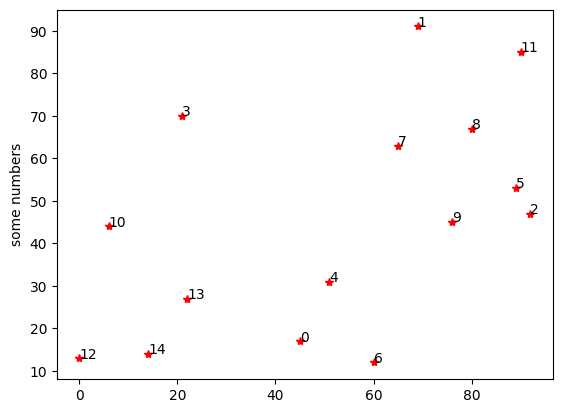

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(x, y, 'r*')

for i, txt in enumerate(range(len(x))):
    ax.annotate(txt, (x[i], y[i]))
plt.ylabel('some numbers')
plt.show()